In [98]:
using MPSKit, TensorKit, Plots, LaTeXStrings, SpecialFunctions, Plots

In [240]:
D = 24 # max bond dimension
d = 16 # local hilbert space dimension

16

In [241]:
function matrix_elems(d)
    phi_sq = zeros(ComplexF64, (d, d))
    pi_sq = zeros(ComplexF64, (d, d))
    phi_4 = zeros(ComplexF64, (d, d))
    phi = zeros(ComplexF64, (d, d))
    for i in 2:d
        phi[i, i - 1] = sqrt((i - 1) / 2)
        phi[i - 1, i] = sqrt((i - 1) / 2)
    end
    for i in 1:d
        if i < d - 1
            phi_sq[i, i + 2] = sqrt(i * (i + 1)) / 2
            phi_sq[i + 2, i] = sqrt(i * (i + 1)) / 2
        end
        phi_sq[i, i] = (2 * i - 1) / 2
    end
    for i in 1:d
        if i < d - 1
            pi_sq[i, i + 2] = - sqrt(i * (i + 1)) / 2
            pi_sq[i + 2, i] = - sqrt(i * (i + 1)) / 2
        end
        pi_sq[i, i] = (2 * i - 1) / 2
    end
    for i in 1:d
        n = i - 1  # occupation number
    
        # diagonal
        phi_4[i, i] = (6 * n^2 + 6 * n + 3) / 4
    
        # connect |n> <-> |n+2>
        if i + 2 <= d
            val = (4 * n + 6) * sqrt((n + 1) * (n + 2)) / 4
            j = i + 2
            phi_4[i, j] = val
            phi_4[j, i] = val   # Hermitian
        end
    
        # connect |n> <-> |n+4>
        if i + 4 <= d
            val = sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
            j = i + 4
            phi_4[i, j] = val
            phi_4[j, i] = val   # Hermitian
        end
    end
    ϕ2 = TensorMap(phi_sq, ℂ^d ← ℂ^d)
    π2 = TensorMap(pi_sq, ℂ^d ← ℂ^d)
    ϕ4 = TensorMap(phi_4, ℂ^d ← ℂ^d)
    ϕ = TensorMap(phi, ℂ^d ← ℂ^d)
    return ϕ, ϕ2, π2, ϕ4
end

matrix_elems (generic function with 1 method)

In [242]:
function get_ham(d, μ0, λ0)
    """
    Prepares the infinte MPO Hamiltonian from μ0, λ0 and
    the local Hilbert space dimension d as inputs
    """
    ϕ, ϕ2, π2, ϕ4 = matrix_elems(d)
    chain = PeriodicVector([ℂ^d])
    single_site_term = (μ0 * ϕ2 + π2) / 2 + λ0 * ϕ4 / 24 + ϕ2
    two_site_term = - ϕ ⊗ ϕ
    ham = InfiniteMPOHamiltonian(chain, 1 => single_site_term, (1, 2) => two_site_term)
    return ham
end

get_ham (generic function with 1 method)

In [243]:
function prep_gs(d, ham)
    """
    Returns the converged ground state of the uMPS
    """
    ψ0 = InfiniteMPS(ℂ^d, ℂ^D)
    ψ, _, _ = find_groundstate(ψ0, ham, VUMPS())
    return ψ
end

prep_gs (generic function with 1 method)

In [284]:
λ0 = 0.2
μ0_sq = -0.08

-0.08

In [285]:
ham = get_ham(d, μ0_sq, λ0)

single site InfiniteMPOHamiltonian{MPSKit.JordanMPOTensor{ComplexF64, ComplexSpace, Union{BraidingTensor{ComplexF64, ComplexSpace}, TensorMap{ComplexF64, ComplexSpace, 2, 2, Vector{ComplexF64}}}, TensorMap{ComplexF64, ComplexSpace, 2, 1, Vector{ComplexF64}}, TensorMap{ComplexF64, ComplexSpace, 1, 2, Vector{ComplexF64}}, TensorMap{ComplexF64, ComplexSpace, 1, 1, Vector{ComplexF64}}}}:
╷  ⋮
┼ W[1]: JordanMPOTensor{ComplexF64, ComplexSpace, Union{BraidingTensor{ComplexF64, ComplexSpace}, TensorMap{ComplexF64, ComplexSpace, 2, 2, Vector{ComplexF64}}}, TensorMap{ComplexF64, ComplexSpace, 2, 1, Vector{ComplexF64}}, TensorMap{ComplexF64, ComplexSpace, 1, 2, Vector{ComplexF64}}, TensorMap{ComplexF64, ComplexSpace, 1, 1, Vector{ComplexF64}}}(((ℂ^1 ⊞ ℂ^1 ⊞ ℂ^1) ⊗ ⊞(ℂ^16)) ← (⊞(ℂ^16) ⊗ (ℂ^1 ⊞ ℂ^1 ⊞ ℂ^1)), SparseBlockTensorMap{Union{BraidingTensor{ComplexF64, ComplexSpace}, TensorMap{ComplexF64, ComplexSpace, 2, 2, Vector{ComplexF64}}}, ComplexF64, ComplexSpace, 2, 2, 4}(Dict{CartesianIndex{4}, Un

In [286]:
ψ_gs = prep_gs(d, ham)

[ Info: VUMPS init:	obj = +4.593881839567e+00	err = 4.4676e-01
[ Info: VUMPS   1:	obj = +8.357162223334e-01	err = 5.7272147570e-02	time = 0.39 sec
[ Info: VUMPS   2:	obj = +6.455190888538e-01	err = 3.9030550278e-02	time = 0.11 sec
[ Info: VUMPS   3:	obj = +6.237970789494e-01	err = 2.9806865347e-02	time = 0.13 sec
[ Info: VUMPS   4:	obj = +6.199255602134e-01	err = 2.0441194322e-02	time = 0.14 sec
[ Info: VUMPS   5:	obj = +6.192374735497e-01	err = 1.3970028744e-02	time = 0.21 sec
[ Info: VUMPS   6:	obj = +6.191171644550e-01	err = 1.9450242305e-02	time = 0.15 sec
[ Info: VUMPS   7:	obj = +6.190864733638e-01	err = 6.7723531766e-03	time = 0.13 sec
[ Info: VUMPS   8:	obj = +6.190801348092e-01	err = 3.7833111582e-03	time = 0.11 sec
[ Info: VUMPS   9:	obj = +6.190786212381e-01	err = 2.6627755154e-03	time = 0.15 sec
[ Info: VUMPS  10:	obj = +6.190781969038e-01	err = 1.9972039179e-03	time = 0.14 sec
[ Info: VUMPS  11:	obj = +6.190780348939e-01	err = 1.2020018793e-03	time = 0.13 sec
[ Info: VUMPS

single site InfiniteMPS:
│   ⋮
│ C[1]: TensorMap{ComplexF64, ComplexSpace, 1, 1, Vector{ComplexF64}}(ComplexF64[0.440599+0.0im, -0.0809-0.0562599im, -0.137434+0.125101im, -0.0146606+0.0964398im, 0.160216+0.0383063im, 0.0745735+0.164737im, -0.161547+0.025934im, -0.0348773-0.0318977im, -0.198402-0.235081im, -0.0864987-0.21274im  …  0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.000163392+0.0im], ℂ^24 ← ℂ^24)
├── AL[1]: TensorMap{ComplexF64, ComplexSpace, 2, 1, Vector{ComplexF64}}(ComplexF64[0.170204+0.205479im, -0.0338909-0.0437467im, -0.0925407-0.0396942im, -0.0178695+0.0242445im, -0.0137474+0.0242445im, -0.0684973-0.0192859im, -0.0770505-0.0924976im, 0.0260258-0.0168861im, -0.0360789-0.0600067im, 0.00512463-0.104759im  …  -8.68221e-5-4.76614e-5im, 8.77987e-5+0.000149349im, -4.86258e-6-4.25822e-5im, -1.41661e-5+0.000157855im, -1.74571e-5-6.54605e-5im, -7.3386e-5+6.98542e-5im, 0.000247228+2.9095e-5im, -6.14309e-5+8.97842e-5im, -0.0001

In [287]:
ϕ, ϕ2, π2, ϕ4 = matrix_elems(d)

(TensorMap{ComplexF64, ComplexSpace, 1, 1, Vector{ComplexF64}}(ComplexF64[0.0 + 0.0im, 0.7071067811865476 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 2.7386127875258306 + 0.0im, 0.0 + 0.0im], ℂ^16 ← ℂ^16), TensorMap{ComplexF64, ComplexSpace, 1, 1, Vector{ComplexF64}}(ComplexF64[0.5 + 0.0im, 0.0 + 0.0im, 0.7071067811865476 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 7.245688373094719 + 0.0im, 0.0 + 0.0im, 15.5 + 0.0im], ℂ^16 ← ℂ^16), TensorMap{ComplexF64, ComplexSpace, 1, 1, Vector{ComplexF64}}(ComplexF64[0.5 + 0.0im, 0.0 + 0.0im, -0.7071067811865476 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.

In [294]:
L = 100 # window length
ψ_window = WindowMPS(ψ_gs, L);

In [295]:
# apply the field operator
mid = L ÷ 2
offset = 15
@tensor excite_right[a, b; c] := ϕ[b, d] * ψ_window.AC[mid + offset][a, d; c]
ψ_window.AC[mid + offset] = excite_right
@tensor excite_left[a, b; c] := ϕ[b, d] * ψ_window.AC[mid - offset][a, d; c]
ψ_window.AC[mid - offset] = excite_left

# normalize after applying the excitations
normalize!(ψ_window);

In [296]:
correlation_length(ψ_gs)

10.517573047748344

In [297]:
T = 100 # grid points for time evolution
field_exp = zeros(Float64, T, L);

In [298]:
for i in 1:L
    field_exp[1, i] = real(expectation_value(ψ_window, i => ϕ))
end

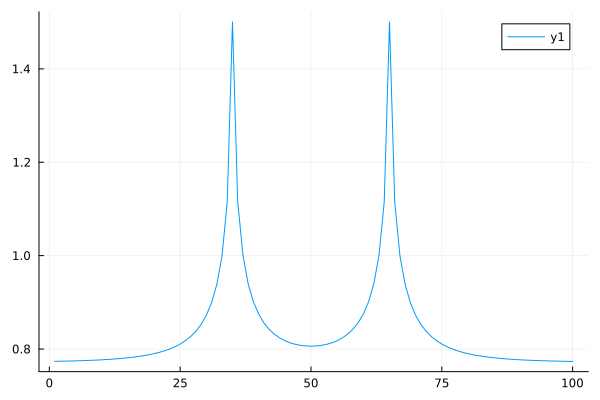

In [299]:
plot(field_exp[1, :])

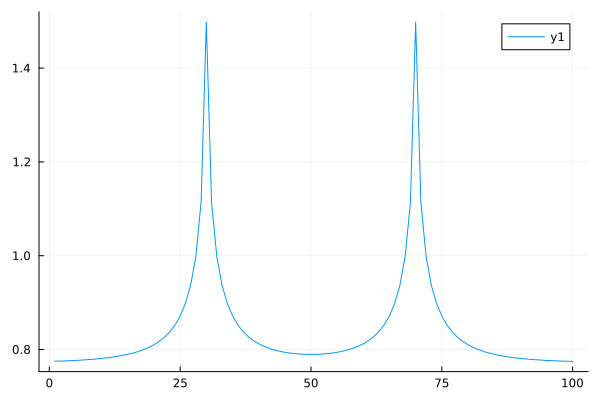

In [270]:
plot(field_exp[1, :])

In [114]:
data = load("./data/scattering_finite_L_100_T_2000_musq_-0.078_d_16_D_24_dt_0.02.jld2")["field_exp"];

In [119]:
data

2000×100 Matrix{Float64}:
 -5.93181e-8  -1.07823e-7  -1.34658e-7  …  7.7119e-8   5.46442e-8  2.83832e-8
 -5.89237e-8  -1.07061e-7  -1.33616e-7     7.71111e-8  5.46384e-8  2.83803e-8
 -5.85258e-8  -1.06291e-7  -1.32563e-7     7.71016e-8  5.46317e-8  2.8377e-8
 -5.81245e-8  -1.05514e-7  -1.31498e-7     7.70906e-8  5.46241e-8  2.83732e-8
 -5.77196e-8  -1.04729e-7  -1.30422e-7     7.70782e-8  5.46154e-8  2.8369e-8
 -5.73113e-8  -1.03936e-7  -1.29334e-7  …  7.70643e-8  5.46057e-8  2.83643e-8
 -5.68995e-8  -1.03136e-7  -1.28235e-7     7.70489e-8  5.45951e-8  2.83592e-8
 -5.64843e-8  -1.02328e-7  -1.27124e-7     7.7032e-8   5.45835e-8  2.83536e-8
 -5.60656e-8  -1.01513e-7  -1.26002e-7     7.70136e-8  5.45709e-8  2.83476e-8
 -5.56434e-8  -1.00691e-7  -1.24869e-7     7.69937e-8  5.45574e-8  2.83411e-8
 -5.52178e-8  -9.98613e-8  -1.23725e-7  …  7.69724e-8  5.45428e-8  2.83342e-8
 -5.47888e-8  -9.90242e-8  -1.2257e-7      7.69495e-8  5.45273e-8  2.83268e-8
 -5.43562e-8  -9.81797e-8  -1.21404e-7  

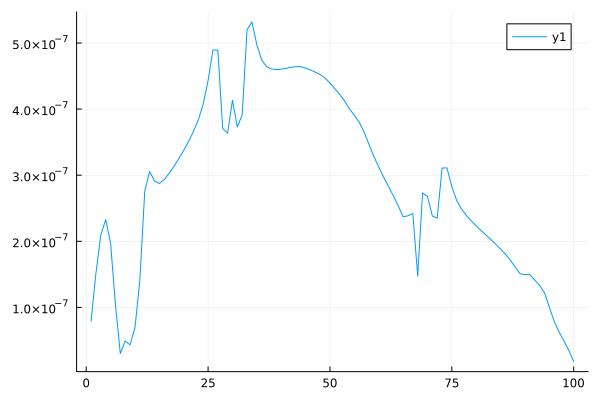

In [123]:
plot(data[200, :])

In [39]:
1000 * 150

150000

In [27]:
dt = 0.02

0.02

In [28]:
for t_step in 2:T
    println("Currently at step $t_step")
    ψ_window, _ = timestep(ψ_window, ham, t_step - 1, dt, TDVP())
    for i in 1:L
        field_exp[t_step, i] = real(expectation_value(ψ_window, i => ϕ))
    end
end

Currently at step 2
Currently at step 3
Currently at step 4
Currently at step 5
Currently at step 6
Currently at step 7
Currently at step 8
Currently at step 9
Currently at step 10
Currently at step 11
Currently at step 12
Currently at step 13
Currently at step 14
Currently at step 15
Currently at step 16
Currently at step 17
Currently at step 18
Currently at step 19
Currently at step 20
Currently at step 21
Currently at step 22
Currently at step 23


LoadError: InterruptException:

In [34]:
x = 1:L
y = 0:0.02:1.98

0.0:0.02:1.98

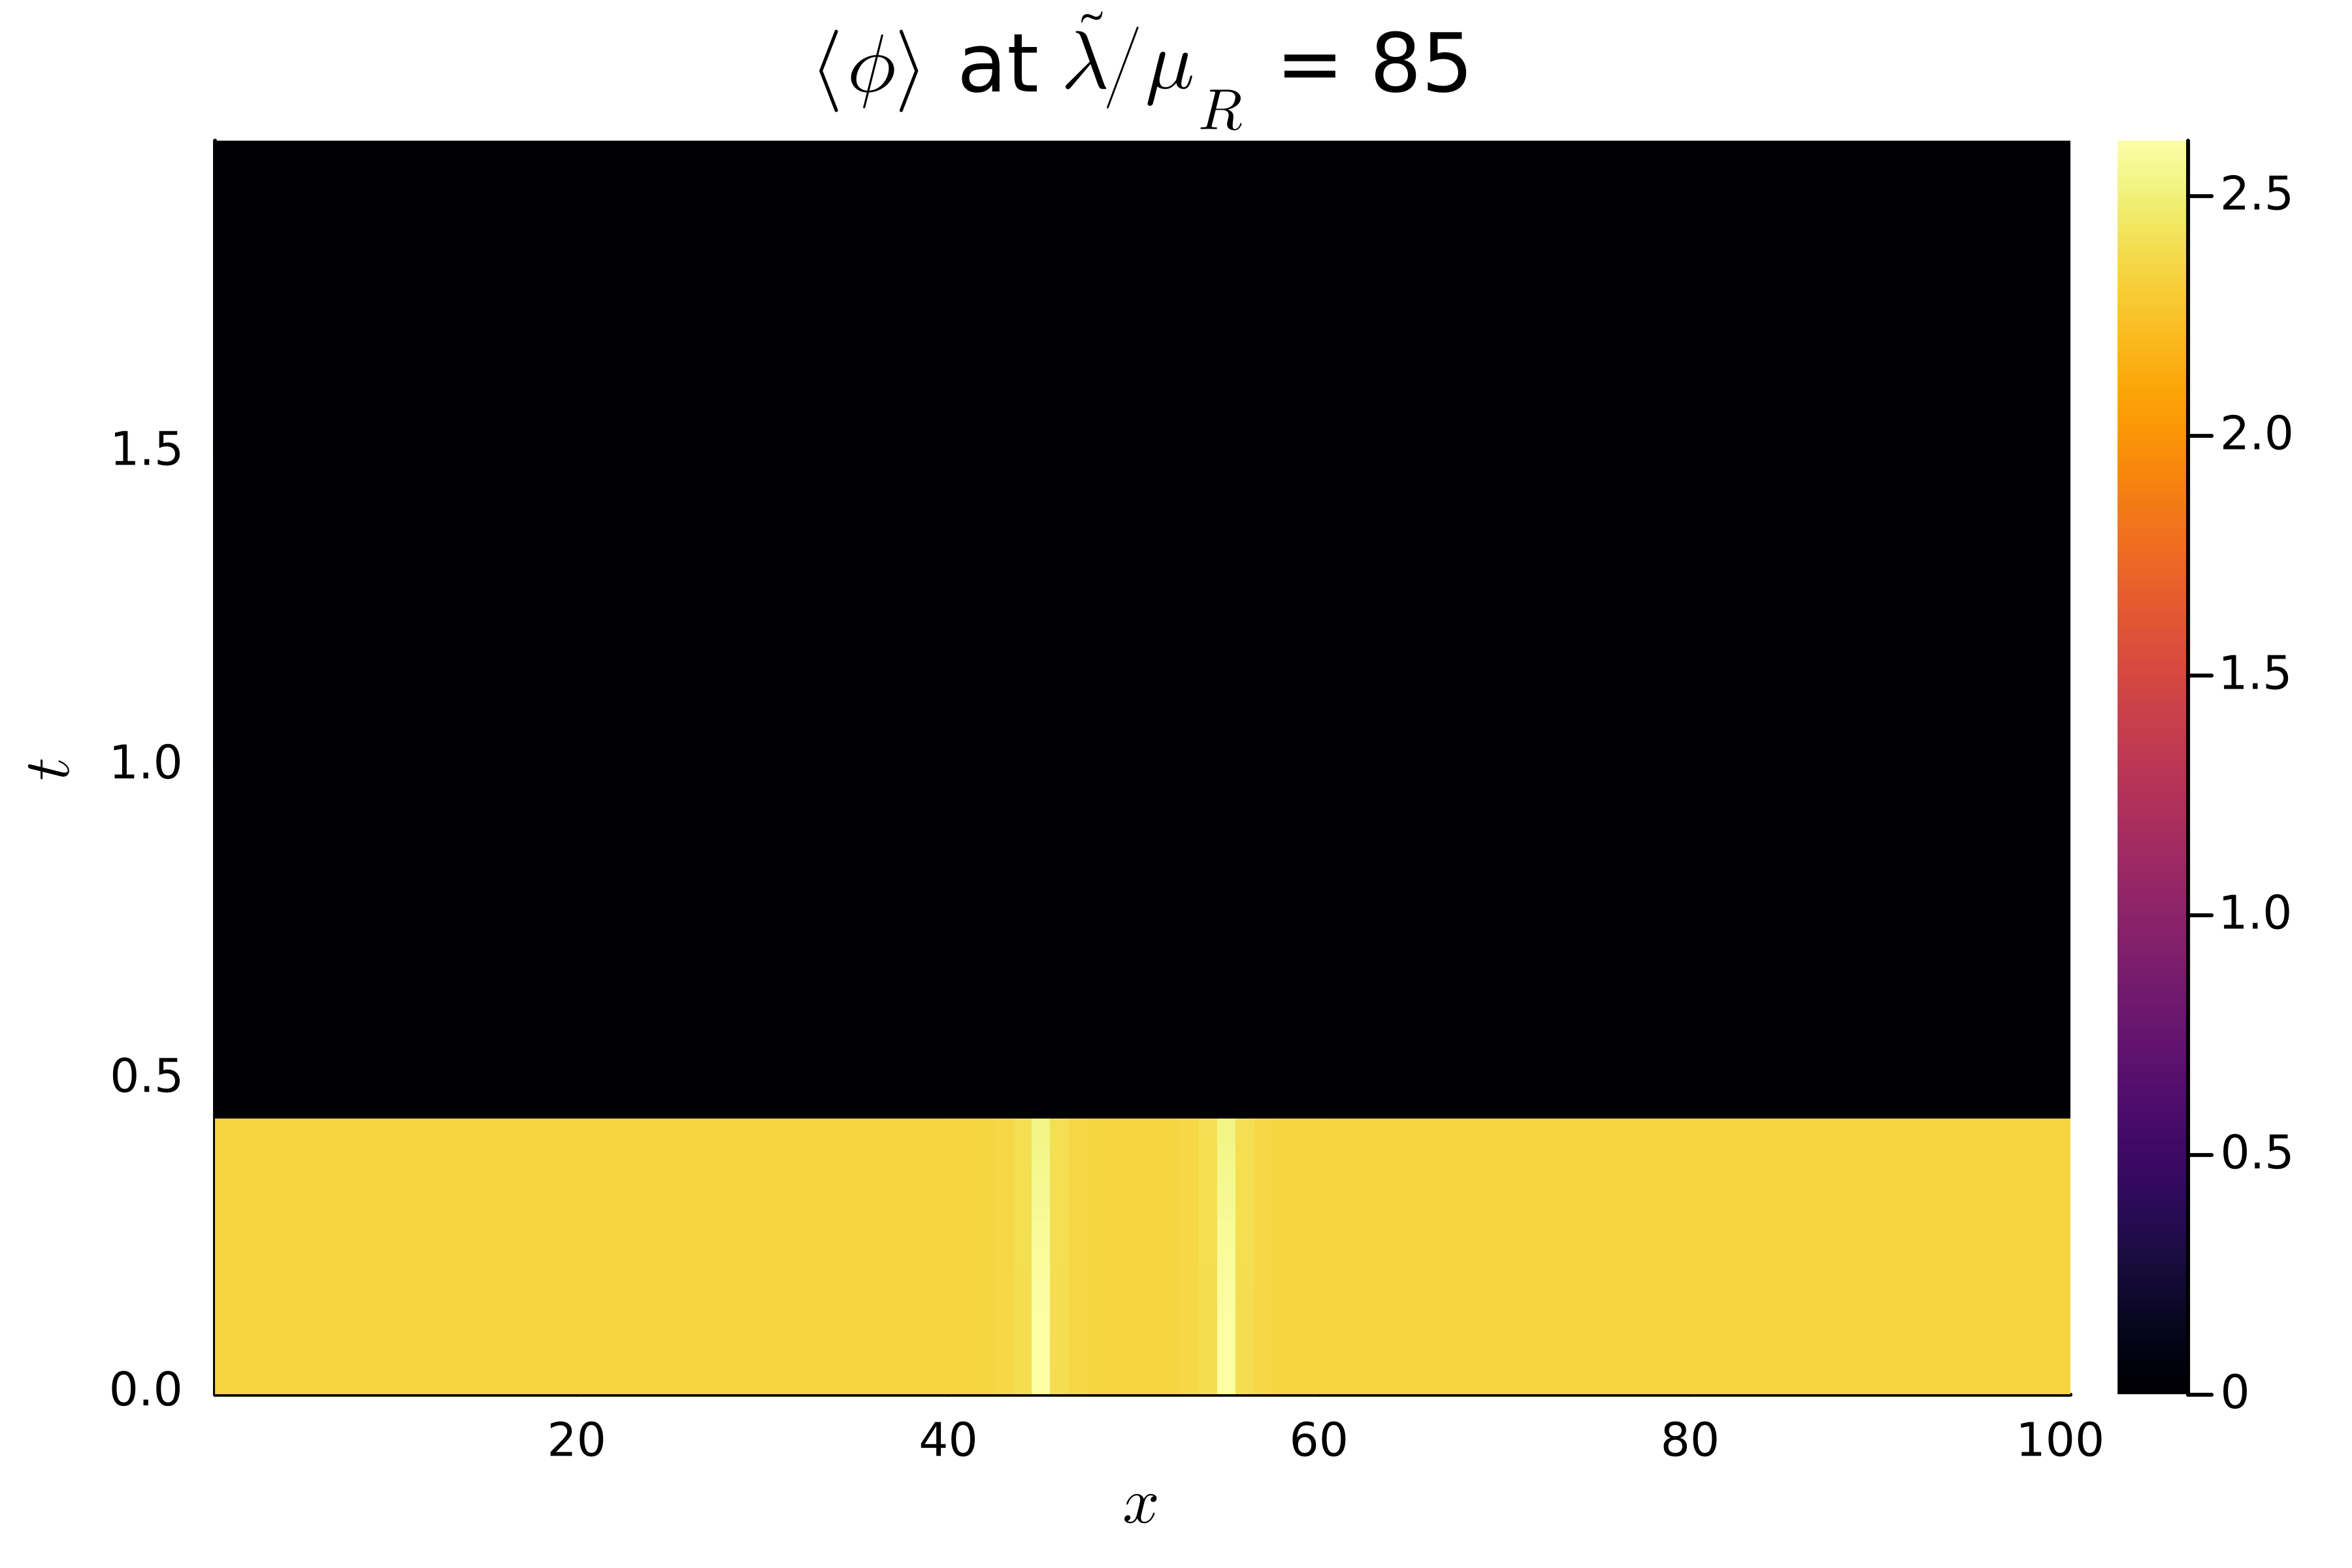

In [38]:
heatmap(x, y, field_exp, dpi = 600, xlabel=L"$x$", ylabel=L"$t$", title=L"$\langle \phi \rangle$ at $\tilde{\lambda} / \mu_R$ = %$κ")

In [55]:
isdir("./plots")

true

In [56]:
if !isdir("./plots")
    mkdir("./plots")
end

In [57]:
savefig("./plots/phi4scattering_d$(d)_D$(D)_kappa$(κ).png")

"/home/ujjwal/MPSJulia/phi4/scattering/plots/phi4scattering_d16_D64_kappa85.png"